In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
current_path = Path.cwd()
tsv_list = list(current_path.glob("*.tsv"))
df_list = [pd.read_csv(str(tsv), sep = "\t") for tsv in sorted(tsv_list)]

In [3]:
rep1 = df_list[0]
rep2 = df_list[1]
rep3 = df_list[2]

rep_list = [rep1, rep2, rep3]

for i, rep in enumerate(rep_list):
    rep["Replicate"] = f"Rep{i + 1}"
    dr_col = str(next(col for col in rep.columns if re.search("DeletionRate", col)))
    renamed = rep.rename(columns = {dr_col: "DeletionRate"}) 
    drop_zero = renamed[renamed["DeletionRate"] != 0].copy()
    rep_list[i] = drop_zero[["DeletionRate", "Replicate"]]

In [4]:
df = pd.concat(rep_list, ignore_index = True)

df

,DeletionRate,Replicate
0,0.100000,Rep1
1,0.100000,Rep1
2,0.100000,Rep1
3,0.100000,Rep1
4,0.096774,Rep1
...,...,...
8029,0.000336,Rep3
8030,0.000336,Rep3
8031,0.000336,Rep3
8032,0.000123,Rep3


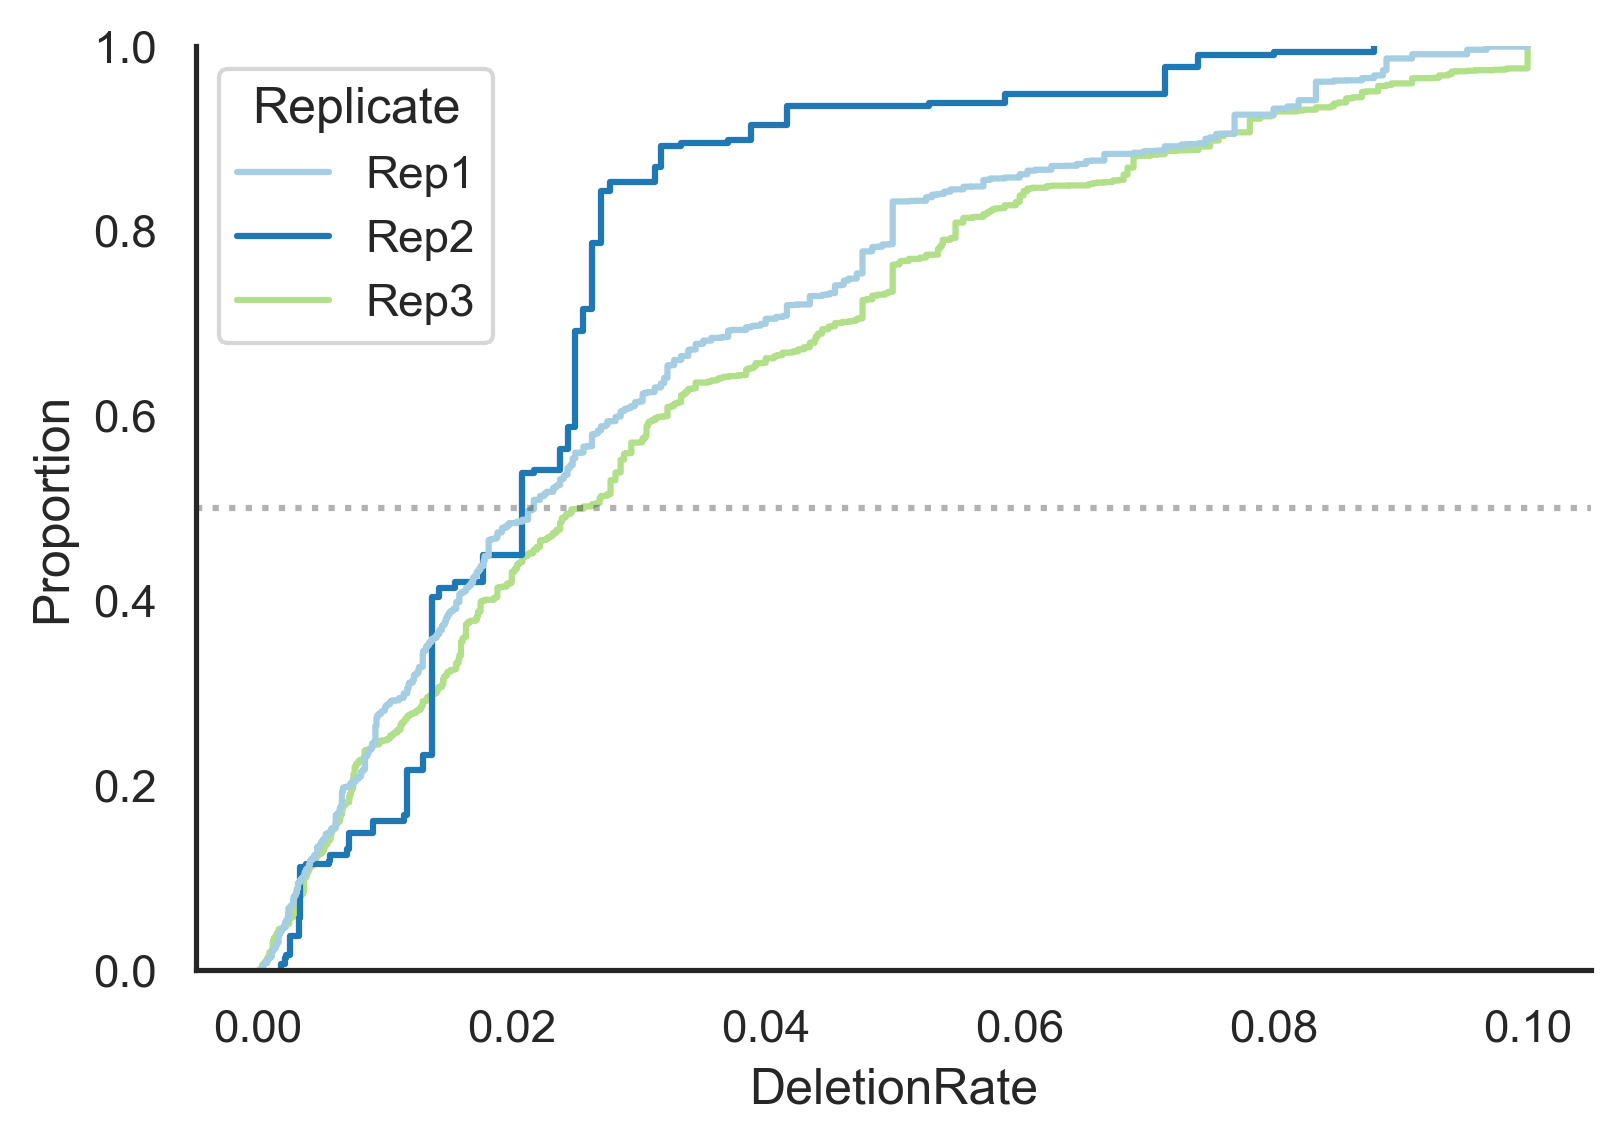

In [ ]:
sns.color_palette("Paired")
plt.figure(figsize=(6,4), dpi=300)

sns.ecdfplot(data = df, x = "DeletionRate", 
             hue = "Replicate",
             palette = "Paired")

plt.axhline(y = 0.5, color = "black", ls = ":", lw = 1.5, alpha = 0.3)

plt.grid(False)
sns.despine()

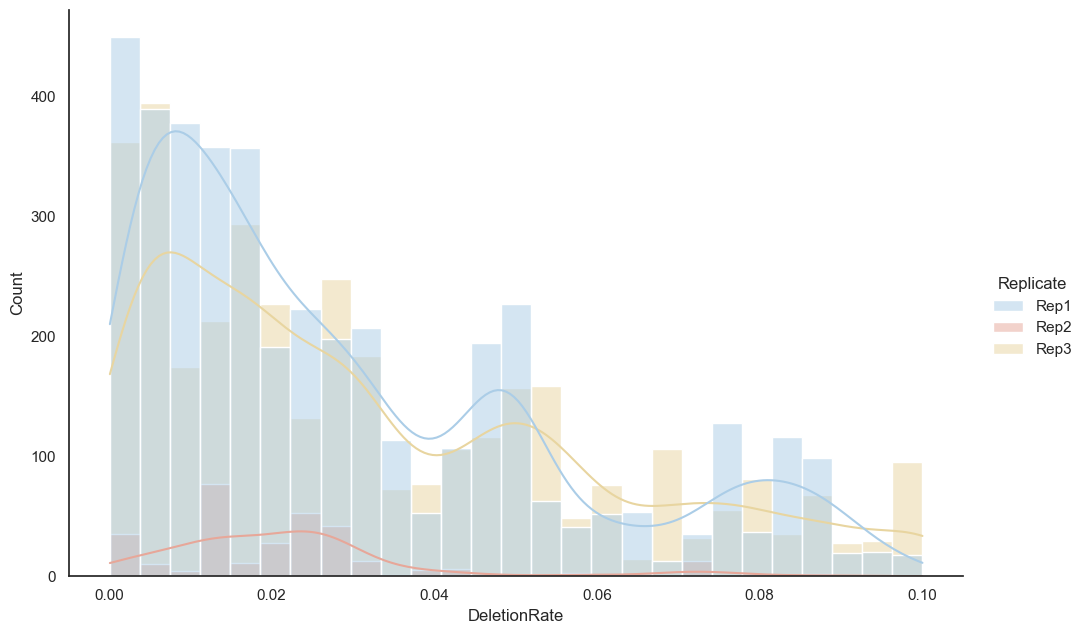

In [32]:
custom_palette = ["#ABCDE7", "#E7A799", "#E8D5A0"]
sns.displot(data = df, x = "DeletionRate",
    kde = True, edgecolor = "white", hue = "Replicate",
    height = 6.5, aspect = 10/6.5,
    palette = custom_palette)